# 第一讲

> 平均值, 标准差, 中值极限定理, 判定和风险, 假设检验

## 均值和标准差

In [5]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy

In [6]:
def drawLine(vFrom, vTo, value,plt,color='red',isHori=False):
    if isHori:
        plt.plot([vFrom,vTo],[value,value],color=color)
    else:
        plt.plot([value,value],[vFrom,vTo],color=color)

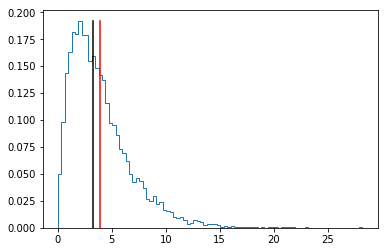

In [7]:
populationN = 10000
pops = {
    'randint':np.random.randint(1,100,populationN),
    'normal':np.random.normal(45,3,populationN),
    'chisq1':np.random.chisquare(1,populationN),
    'chisq2':np.random.chisquare(2,populationN),
    'chisq4':np.random.chisquare(4,populationN),
    'chisq20':np.random.chisquare(20,populationN),
}
pop1 = pops['chisq4']

count,bins,ignored = plt.hist(pop1,'auto',density=True,histtype='step')
c_max = count.max()
c_min = count.min()
drawLine(0,c_max,np.mean(pop1),plt,isHori=False)
drawLine(0,c_max,np.median(pop1),plt,color='black',isHori=False)
# drawLine(0,c_max,np.quantile(pop1,0.25),plt,color='green',isHori=False)
# drawLine(0,c_max,np.quantile(pop1,0.75),plt,color='orange',isHori=False)
plt.show()

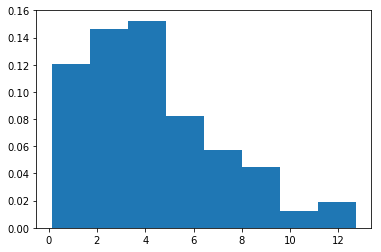

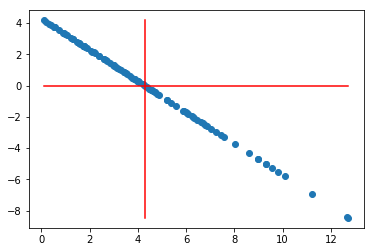

In [8]:
sampleN = 100
sample = np.random.choice(pop1,sampleN)
count,bins,ignored = plt.hist(sample,'auto',density=True)
plt.show()
s_min = math.floor(sample.min())
s_max = math.floor(sample.max())
s_mean = np.mean(sample)
sums_xi_minus_mean = []
for (i,e) in enumerate(sample):
    sums_xi_minus_mean.append((e,np.mean(sample-e)))
sums_xi_minus_mean.append((s_mean,np.mean(sample-s_mean)))
x_coords,y_coords = zip(*sums_xi_minus_mean)
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)
plt.scatter(x_coords,y_coords)
drawLine(y_coords.min(),y_coords.max(),s_mean,plt,isHori=False)
drawLine(x_coords.min(),x_coords.max(),np.mean(sample-s_mean),plt,isHori=True)
plt.show()

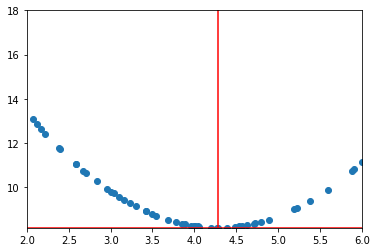

In [9]:
sums_xi_minus_mean_square = []
zoom_in = True
for (i,e) in enumerate(sample):
    sums_xi_minus_mean_square.append((e,np.mean((sample-e)*(sample-e))))
sums_xi_minus_mean_square.append((s_mean,np.mean((sample-s_mean)*(sample-s_mean))))
x_coords,y_coords = zip(*sums_xi_minus_mean_square)
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)
plt.scatter(x_coords,y_coords)
drawLine(y_coords.min(),y_coords.max(),s_mean,plt,isHori=False)
drawLine(x_coords.min(),x_coords.max(),np.mean((sample-s_mean)*(sample-s_mean)),plt,isHori=True)
if zoom_in:
    plt.xlim(2,6)
    plt.ylim(np.mean((sample-s_mean)*(sample-s_mean)),18)
plt.show()

## 样本和与样本平均数的分布规律

### 思考题

现在让我们考虑这样一个问题，假设有一个很大的盒子，里面只有标着-1,0或者1的三种纸条，各种纸条的比例是相同的，纸条数量非常多，以至于每次抽出任何一个纸条以后，盒内三种纸条的比例仍然是1:1:1。

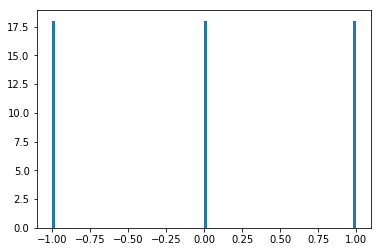

In [10]:
list3type = np.random.randint(-1,2,10000000)
count,bins,ignored=plt.hist(list3type,'auto',density=True)
plt.show()

如果每次我们抽200个纸条，对纸条的值求和，然后不断重复这个实验50次,100次，500次和10000次分别看一下纸条求和的变化情况

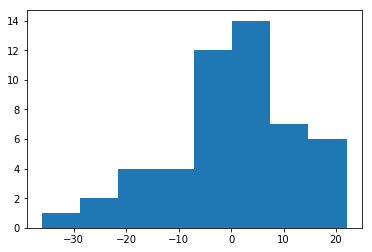

In [11]:
# sample size
sampleN = 200
#  iteration times
iteration = 50
sum_sample = []
for i in range(iteration):
    sample = np.random.choice(list3type,sampleN)
    sum_sample.append(np.sum(sample))
count,bins,ignored = plt.hist(sum_sample,'auto',density=False)
plt.show()

**中值极限定理.2 平均值的中心极限定理**

假定，多批次等容量随机样本是从同一个无限总体中采集的，算出每一个批次样本的平均数，将不同批次的样本平均数放在一起可以形成一个新的分布，并且这个分布是接近正态的。

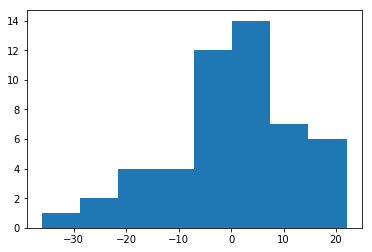

In [12]:
# sample size
sampleN = 200
#  iteration times
iteration = 50
mean_sample = []
for i in range(iteration):
    sample = np.random.choice(list3type,sampleN)
    mean_sample.append(np.mean(sample))
count,bins,ignored = plt.hist(sum_sample,'auto',density=False)
plt.show()

**中值极限定理.3 平均值的分布**
假定无穷多个等容量随机样本是从同一个无限总体中抽取的，而且吧这些样本的平均数放在一起，形成的新分布均值与原分布均值相同

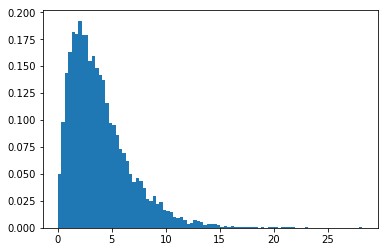

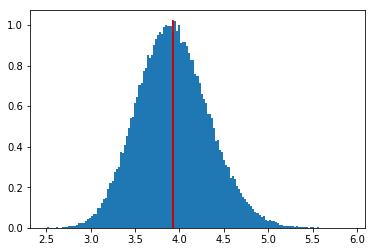

In [13]:
pop_clt = pops['chisq4']
mean_pop_clt = np.mean(pop_clt)
# sample size
sample_size = 50
# iteration times
iteration = 100000
cnt1,bins1,ign1 = plt.hist(pop_clt,'auto',density=True)
plt.show()
mean_sample = []
for i in range(iteration):
    sample = np.random.choice(pop_clt,sample_size)
    mean_sample.append(np.mean(sample))
cnt2,bins2,ign2 = plt.hist(mean_sample, 'auto', density = True)
y_min = cnt2.min()
y_max = cnt2.max()
drawLine(y_min,y_max,np.mean(pop_clt),plt,color='black')
drawLine(y_min,y_max,np.mean(mean_sample),plt,color='red')
plt.show()

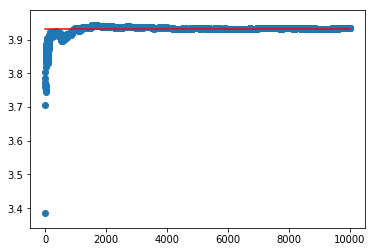

In [14]:
pop_clt = pops['chisq4']
mean_pop_clt = np.mean(pop_clt)
# sample size
sample_size = 50
# iteration times
iteration = 10000
# cnt1,bins1,ign1 = plt.hist(pop_clt,'auto',density=True)
# plt.show()
mean_sample = []
scatterPlots = []
for i in range(iteration):
    sample = np.random.choice(pop_clt,sample_size)
    mean_sample.append(np.mean(sample))
    scatterPlots.append((i,np.mean(mean_sample)))

scatter_xs,scatter_ys = zip(*scatterPlots)
plt.scatter(scatter_xs,scatter_ys)
drawLine(0,iteration,mean_pop_clt,plt,isHori=True)
plt.show()

**中值极限定理.4 平均值分布的标准差**

$\sigma_{\bar x} = \frac{\sigma}{\sqrt{N}}$

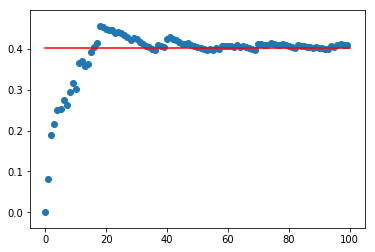

In [15]:
pop_clt = pops['chisq4']
std_pop_clt = np.std(pop_clt)

# sample size
sample_size = 50
# calculated mean dist sigma
calc_std_pop_clt = std_pop_clt/math.sqrt(sample_size)
# iteration times
iteration = 100
# cnt1,bins1,ign1 = plt.hist(pop_clt,'auto',density=True)
# plt.show()
mean_sample = []
scatterPlots = []
for i in range(iteration):
    sample = np.random.choice(pop_clt,sample_size)
    mean_sample.append(np.mean(sample))
    scatterPlots.append((i,np.std(mean_sample)))

scatter_xs,scatter_ys = zip(*scatterPlots)
plt.scatter(scatter_xs,scatter_ys)
drawLine(0,iteration,calc_std_pop_clt,plt,isHori=True)
plt.show()

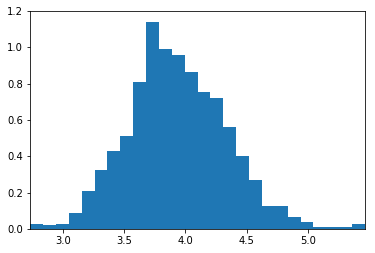

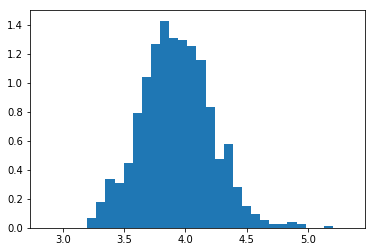

In [16]:
pop_clt = pops['chisq4']
std_pop_clt = np.std(pop_clt)
def mean_dist(sample_size,iteration):
    mean_sample = []
    for i in range(iteration):
        sample = np.random.choice(pop_clt,sample_size)
        mean_sample.append(np.mean(sample))
    cnt,bins,ign = plt.hist(mean_sample,'auto',density=True)
    return (cnt,bins,ign)
cnt,bins,ign = mean_dist(50,1000)
plt.xlim(bins.min(),bins.max())
plt.show()
mean_dist(100,1000)
plt.xlim(bins.min(),bins.max())
plt.show()
